In [1]:
                    %pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
from matplotlib_venn import venn3
import matplotlib.patches as mpatches

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
import kmapper as km
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

In [2]:
data = pd.read_csv('METABRIC_RNA_Mutation.csv')
data

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [4]:
data['nottingham_prognostic_index']

0       6.044
1       4.020
2       4.030
3       4.050
4       6.080
        ...  
1899    5.050
1900    5.040
1901    6.050
1902    5.050
1903    5.040
Name: nottingham_prognostic_index, Length: 1904, dtype: float64

In [5]:
df = data.loc[:,"patient_id":"death_from_cancer"]
df.shape

(1904, 31)

In [6]:
#Cheking the percentage of missing values
print(df.isnull().sum()/len(data)/100)

patient_id                        0.000000
age_at_diagnosis                  0.000000
type_of_breast_surgery            0.000116
cancer_type                       0.000000
cancer_type_detailed              0.000079
cellularity                       0.000284
chemotherapy                      0.000000
pam50_+_claudin-low_subtype       0.000000
cohort                            0.000000
er_status_measured_by_ihc         0.000158
er_status                         0.000000
neoplasm_histologic_grade         0.000378
her2_status_measured_by_snp6      0.000000
her2_status                       0.000000
tumor_other_histologic_subtype    0.000079
hormone_therapy                   0.000000
inferred_menopausal_state         0.000000
integrative_cluster               0.000000
primary_tumor_laterality          0.000557
lymph_nodes_examined_positive     0.000000
mutation_count                    0.000236
nottingham_prognostic_index       0.000000
oncotree_code                     0.000079
overall_sur

### DATA VISUALIZATION 

Text(0.5, 1.0, 'Missing value')

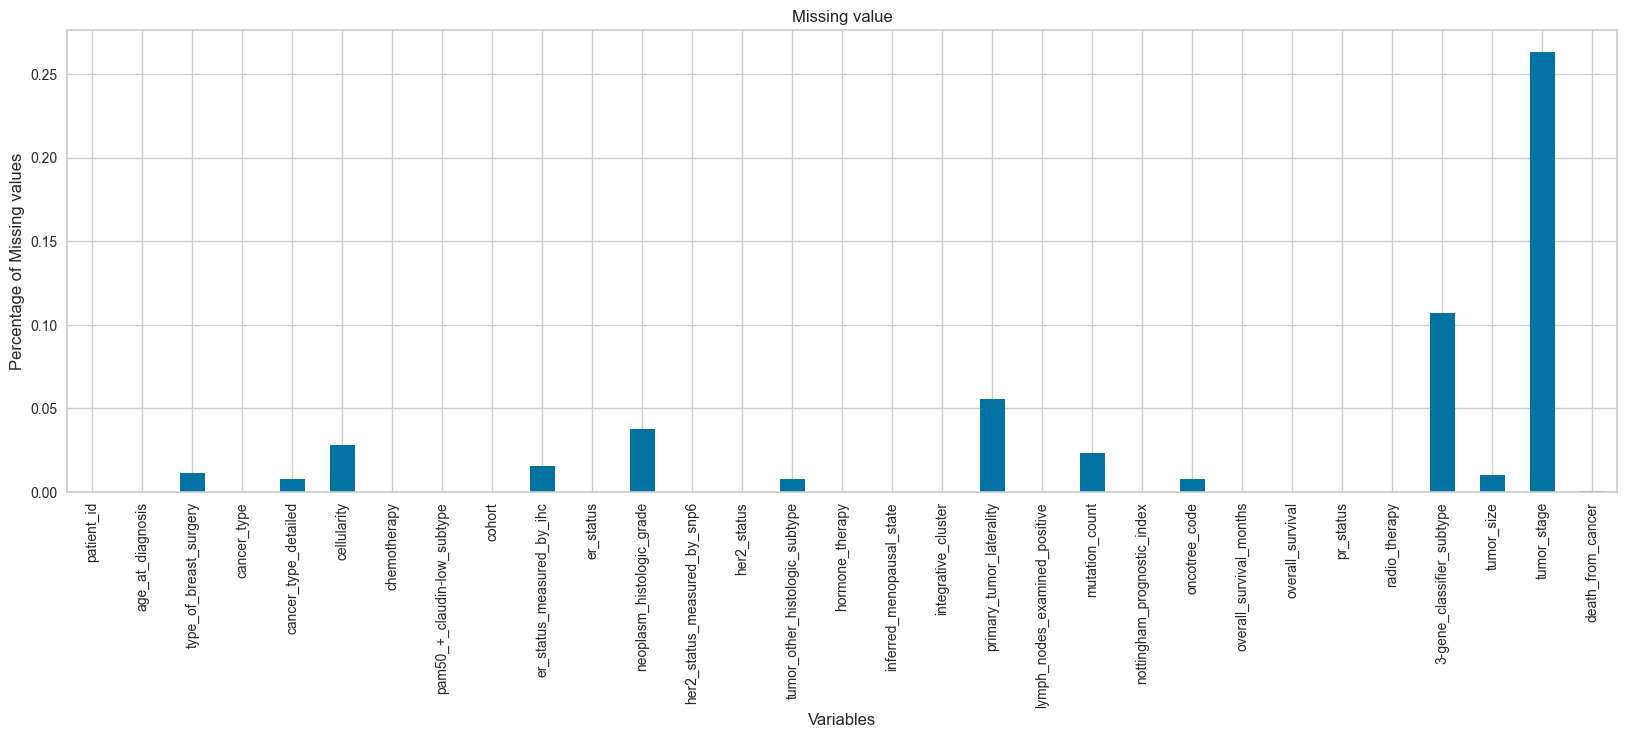

In [7]:
#Plot of missing value percentage 
df.isnull().mean().plot.bar(figsize=(20,6))
plt.ylabel('Percentage of Missing values')
plt.xlabel("Variables")
plt.title("Missing value")

In [8]:
#Numeric Variable
#function that takes a dataframe adn transforms it into a standard form after dropping num_numerical column.setdefault()

def to_standard(df):
    num_df = df[df.select_dtypes(include=np.number).columns.tolist()]

    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    std_df = pd.DataFrame(std, index = num_df.index, columns=num_df.columns)
    return std_df

Text(0, 0.5, 'Variables')

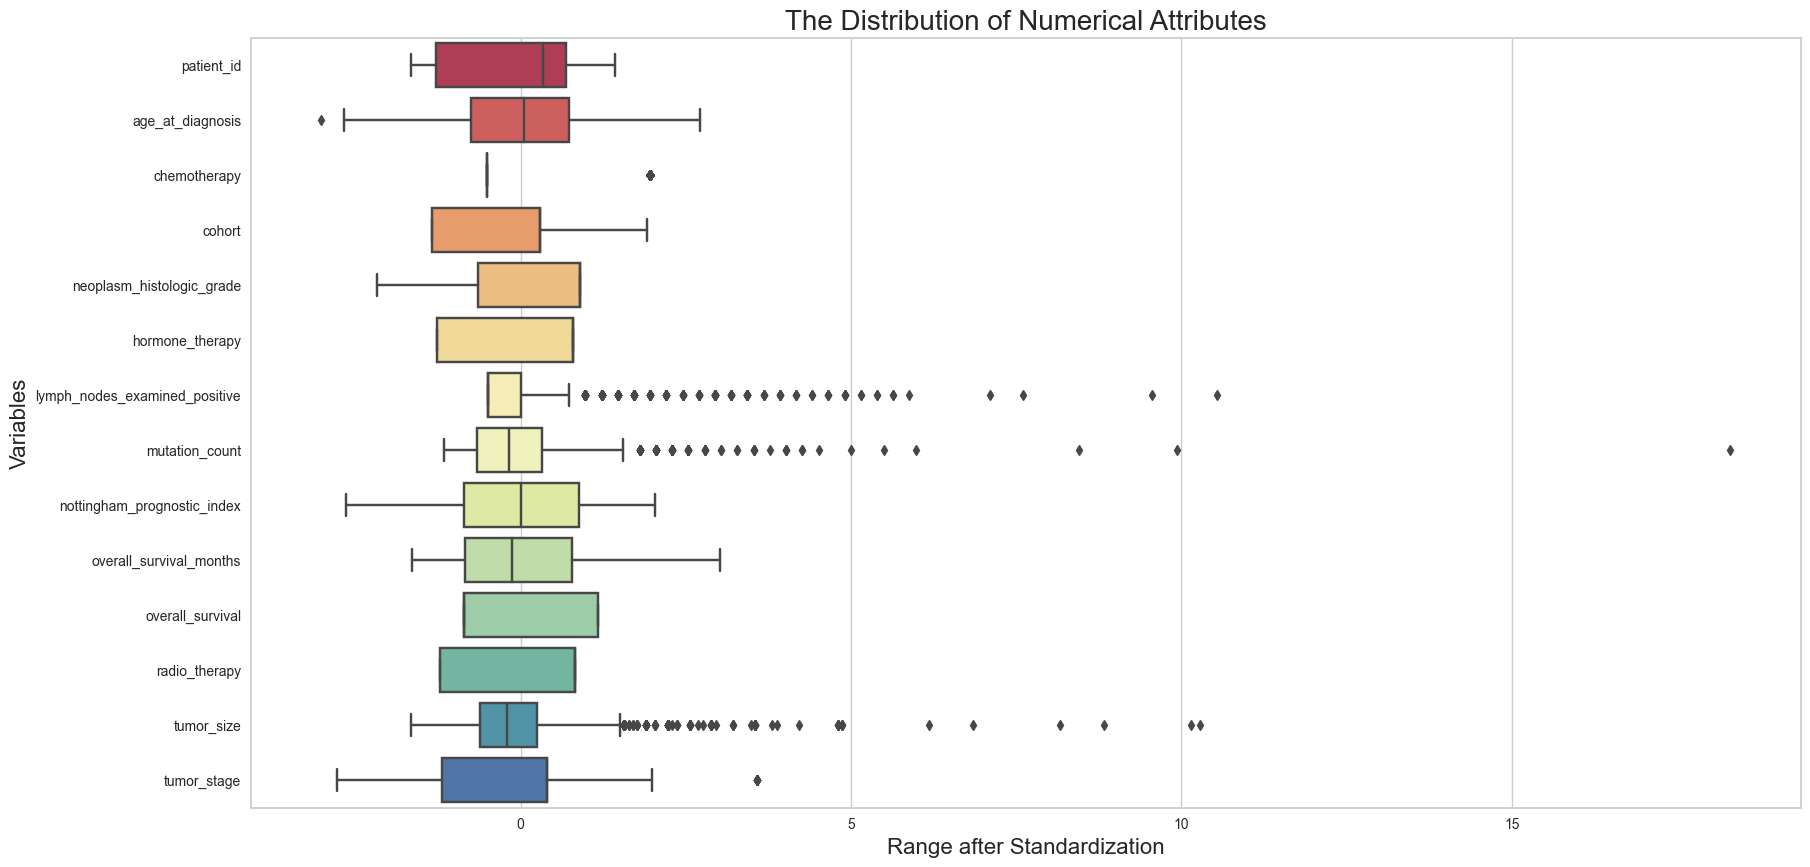

In [9]:
#plotting the box plots of numerical variables
ax, fig = plt.subplots(1,1,figsize=(20,10))
plt.title("The Distribution of Numerical Attributes", fontsize = 20)

sns.boxplot(y='variable', x="value", data=pd.melt(to_standard(df)),palette='Spectral')
plt.xlabel('Range after Standardization', size=16)
plt.ylabel('Variables', size=16)

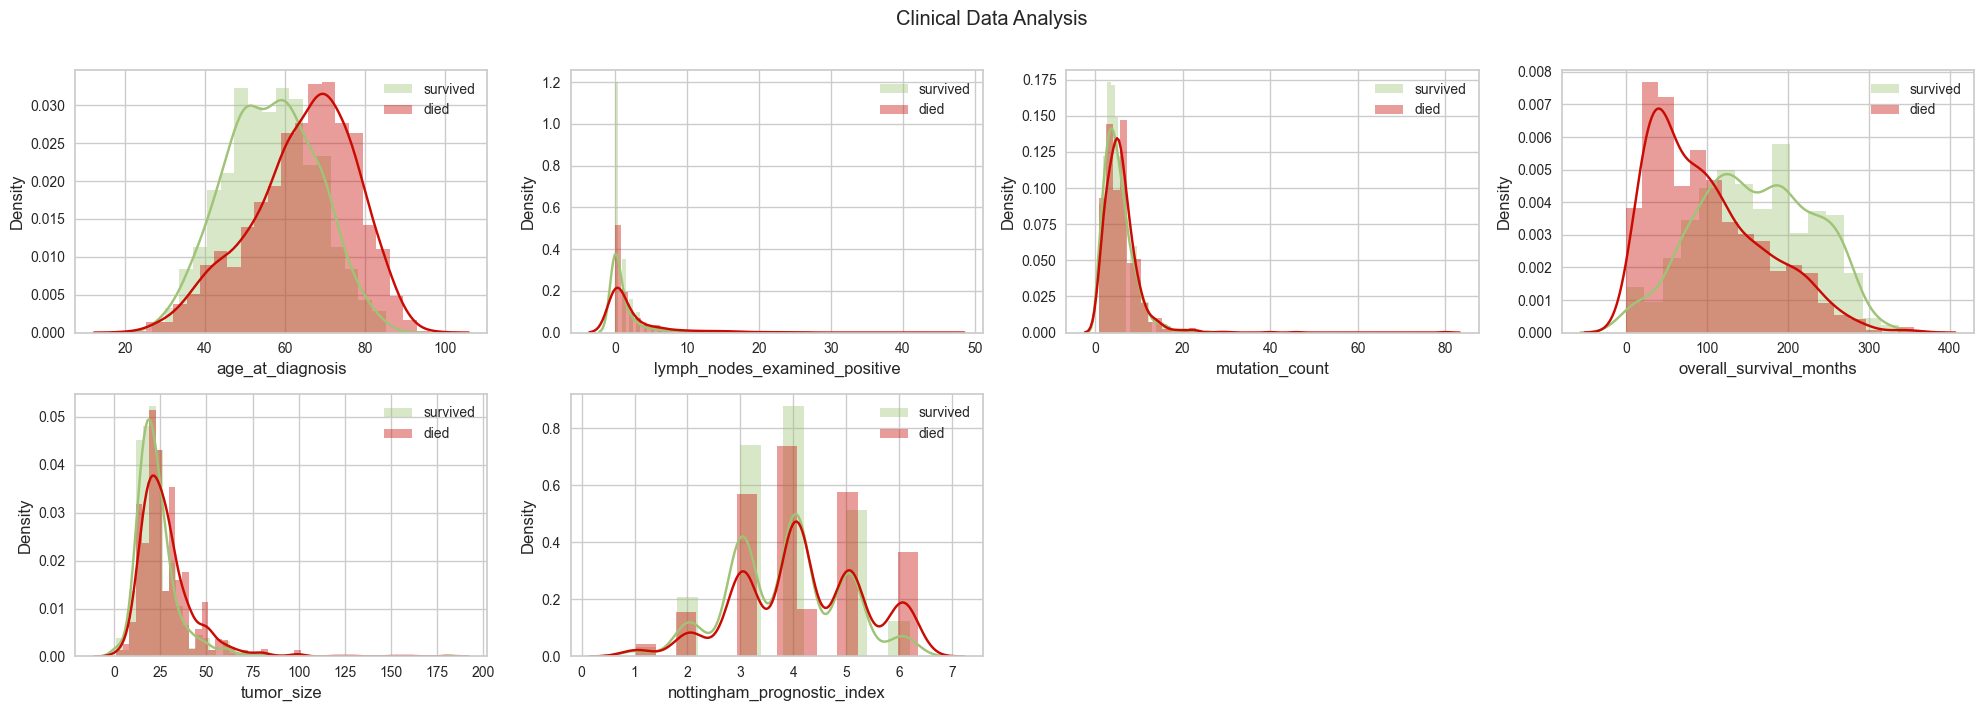

In [10]:
fig = plt.figure(figsize=(20,20))
j = 0
num_clinical_columns=['age_at_diagnosis', 'lymph_nodes_examined_positive', 'mutation_count', 'overall_survival_months','tumor_size', 'nottingham_prognostic_index']
for i in data[num_clinical_columns].columns:
    plt.subplot(6,4,j+1)
    j +=1
    sns.distplot(df[i][df['overall_survival']==1],color='g',label='survived')
    sns.distplot(df[i][df['overall_survival']==0],color='r',label='died')
    plt.legend(loc='best')

fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Visualization of Clinical Columns in Dataframe

In [11]:
died=df[df['overall_survival']==0]
survived=df[df['overall_survival']==1]

alive_from_cancer=df[df['death_from_cancer']=='Living']
died_from_cancer = df[df['death_from_cancer']=='Died of Disease']
died_not_from_cancer = df[df['death_from_cancer']=='Died of Other Causes']

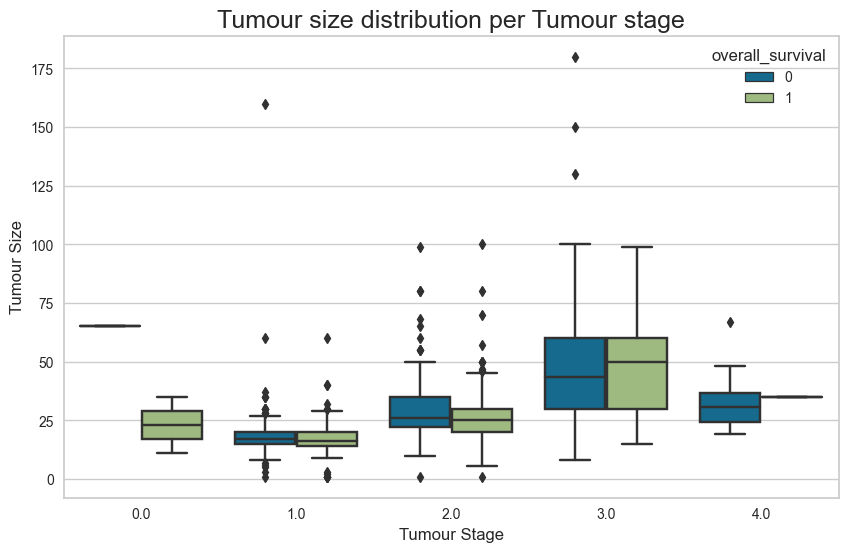

In [12]:
ig, ax = plt.subplots( figsize=(10,6))
ax = sns.boxplot(x='tumor_stage', y= 'tumor_size', data=df, orient='v', hue='overall_survival')

ax.set_ylabel("Tumour Size")
ax.set_xlabel('Tumour Stage')
plt.title("Tumour size distribution per Tumour stage", fontsize=18)
plt.show()

AttributeError: 'Axes' object has no attribute 'set_xlabels'

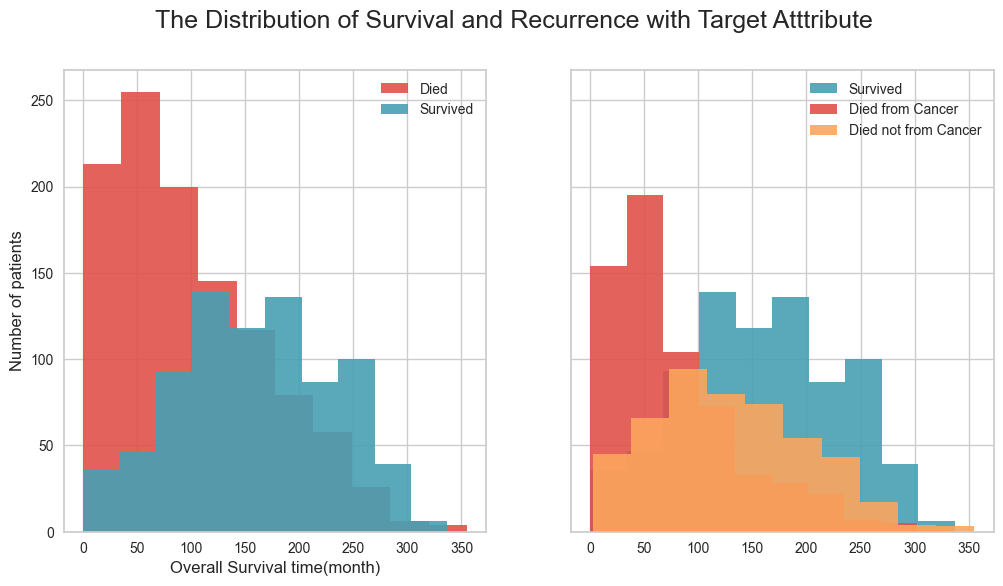

In [13]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Atttribute', fontsize=18)

ax[0].hist(died['overall_survival_months'],alpha=0.9, color = sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9,color=sns.color_palette(color)[5],label='Survived')

ax[0].legend()

ax[1].hist(alive_from_cancer['overall_survival_months'],alpha=0.9,color=sns.color_palette(color)[5],label='Survived')
ax[1].hist(died_from_cancer['overall_survival_months'],alpha=0.9,color=sns.color_palette(color)[0], label='Died from Cancer')
ax[1].hist(died_not_from_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from Cancer')

ax[1].legend()


ax[0].set_xlabel("Overall Survival time(month)")
ax[0].set_ylabel("Number of patients")

ax[1].set_xlabels('Overall survival time(months)')
ax[1].set_ylabel("")

plt.show()

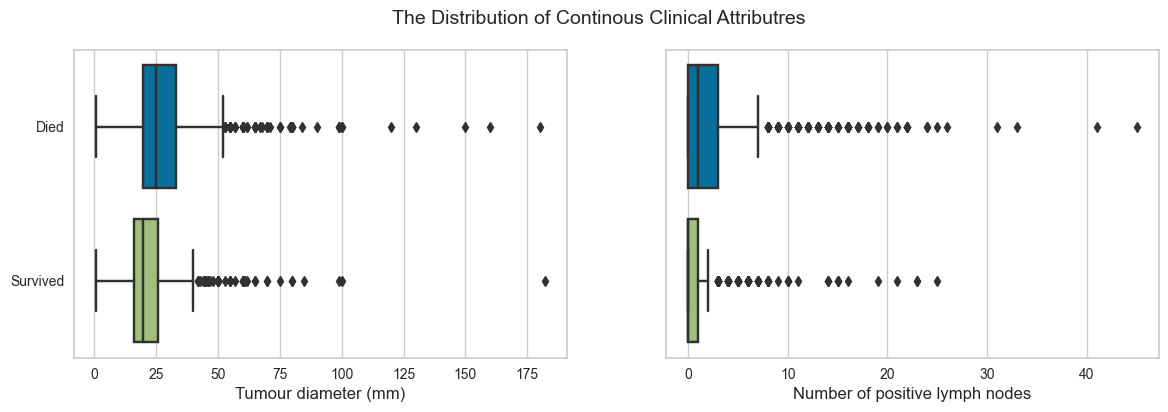

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize= (14,4), sharey=True)

sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=df, ax=ax[0], saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=df, ax=ax[1], saturation=0.90)

fig.suptitle("The Distribution of Continous Clinical Attributres", fontsize=14)
plt.yticks([-0.5,0, 1, 1.5], ['', 'Died', 'Survived', ''])

ax[0].set_xlabel('Tumour diameter (mm)')
ax[0].set_ylabel('')

ax[1].set_xlabel('Number of positive lymph nodes')
ax[1].set_ylabel('')

plt.show()

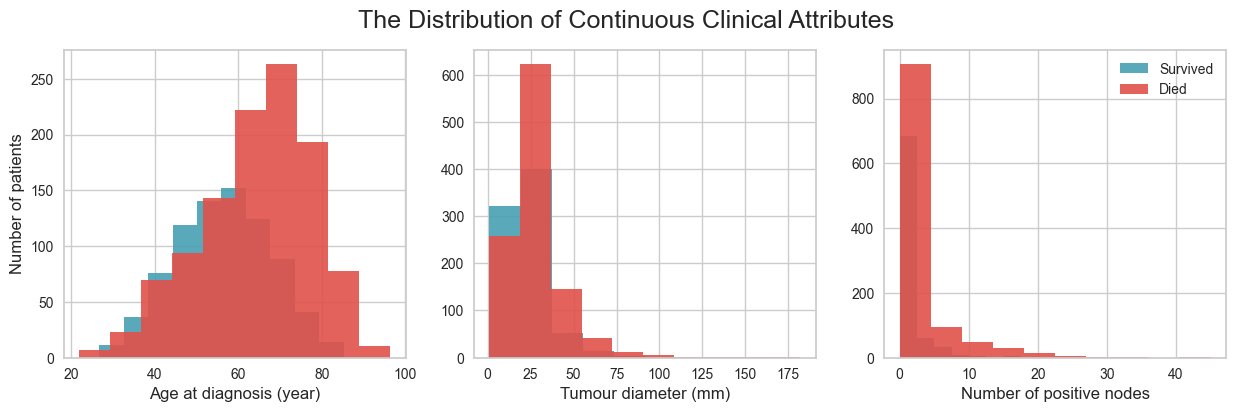

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15,4))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[0].legend()

ax[1].hist(survived['tumor_size'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[2].legend()

ax[0].set_xlabel('Age at diagnosis (year)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

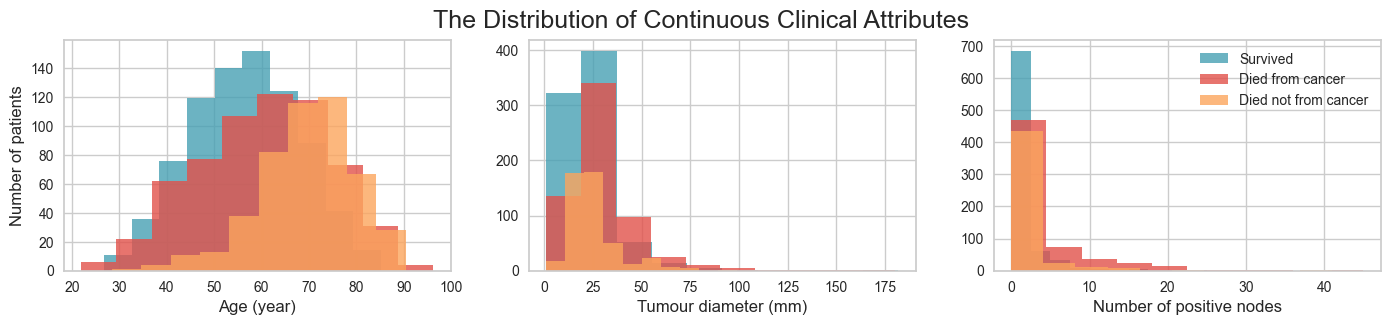

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(17,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(alive_from_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died_from_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[0].hist(died_not_from_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
#ax[0].legend()

ax[1].hist(alive_from_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_from_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_from_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died_from_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[2].hist(died_not_from_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[2].legend()

ax[0].set_xlabel('Age (year)')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

KeyError: 0

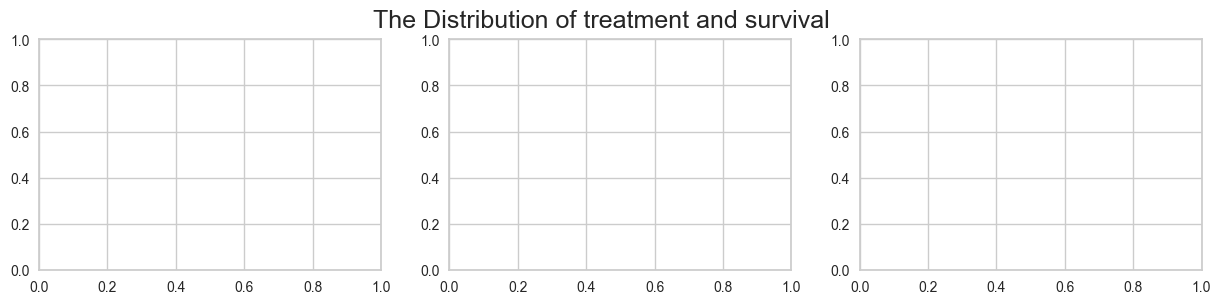

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

sns.countplot(died['chemotherapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[0], saturation=0.90)
sns.countplot(x=survived['chemotherapy'] , color=sns.color_palette(color)[5], label='Survived', ax=ax[0], saturation=0.90)

ax[0].legend()
ax[0].set(xticklabels=['No','Yes'])

sns.countplot(died['hormone_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[1], saturation=0.90)
sns.countplot(x=survived['hormone_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[1], saturation=0.90)

ax[1].legend()
ax[1].set(xticklabels=['No','Yes'])

sns.countplot(died['radio_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[2], saturation=0.90)
sns.countplot(x=survived['radio_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[2], saturation=0.90)

ax[2].legend()
ax[2].set(xticklabels=['No','Yes'])

ax[0].set_xlabel('Chemotherapy')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Hormonal therapy')
ax[1].set_ylabel('')
ax[2].set_xlabel('Radio therapy')
ax[2].set_ylabel('')

plt.show()

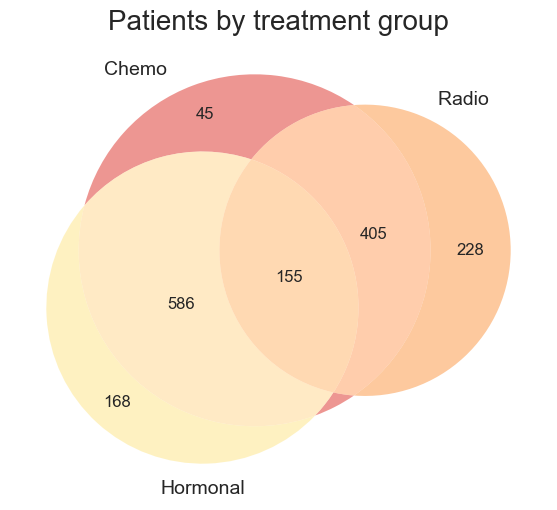

In [ ]:
#create subsets for different combinations of treatments
chemo = df[(df["chemotherapy"]==True) & (df["radio_therapy"]==False) & (df["hormone_therapy"]==False)]
radio = df[(df["chemotherapy"]==False) & (df["radio_therapy"]==True) & (df["hormone_therapy"]==False)]
hormonal = df[(df["chemotherapy"]==False) & (df["radio_therapy"]==False) & (df["hormone_therapy"]==True)]
chemo_radio = df[(df["chemotherapy"]==True) & (df["radio_therapy"]==True) & (df["hormone_therapy"]==False)]
radio_hormonal = df[(df["chemotherapy"]==False) & (df["radio_therapy"]==True) & (df["hormone_therapy"]==True)]
hormonal_chemo = df[(df["chemotherapy"]==True) & (df["radio_therapy"]==False) & (df["hormone_therapy"]==True)]
all_3 = df[(df["chemotherapy"]==True) & (df["radio_therapy"]==True) & (df["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(8,6))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette(color))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Patients by treatment group", size=20)
plt.show()

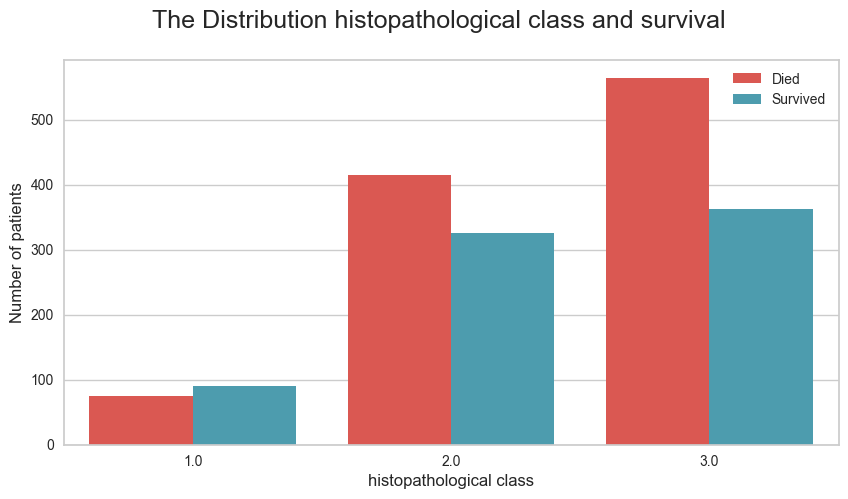

In [ ]:
fig, ax = plt.subplots( figsize=(10,5))
fig.suptitle('The Distribution histopathological class and survival', fontsize = 18)

sns.countplot(x='neoplasm_histologic_grade', hue='overall_survival' ,data = df, palette=two_colors , ax=ax, saturation=0.90)
ax.legend([ 'Died', 'Survived'])

ax.set_xlabel('histopathological class')
ax.set_ylabel('Number of patients')

plt.show()

### Correlation between the attributes

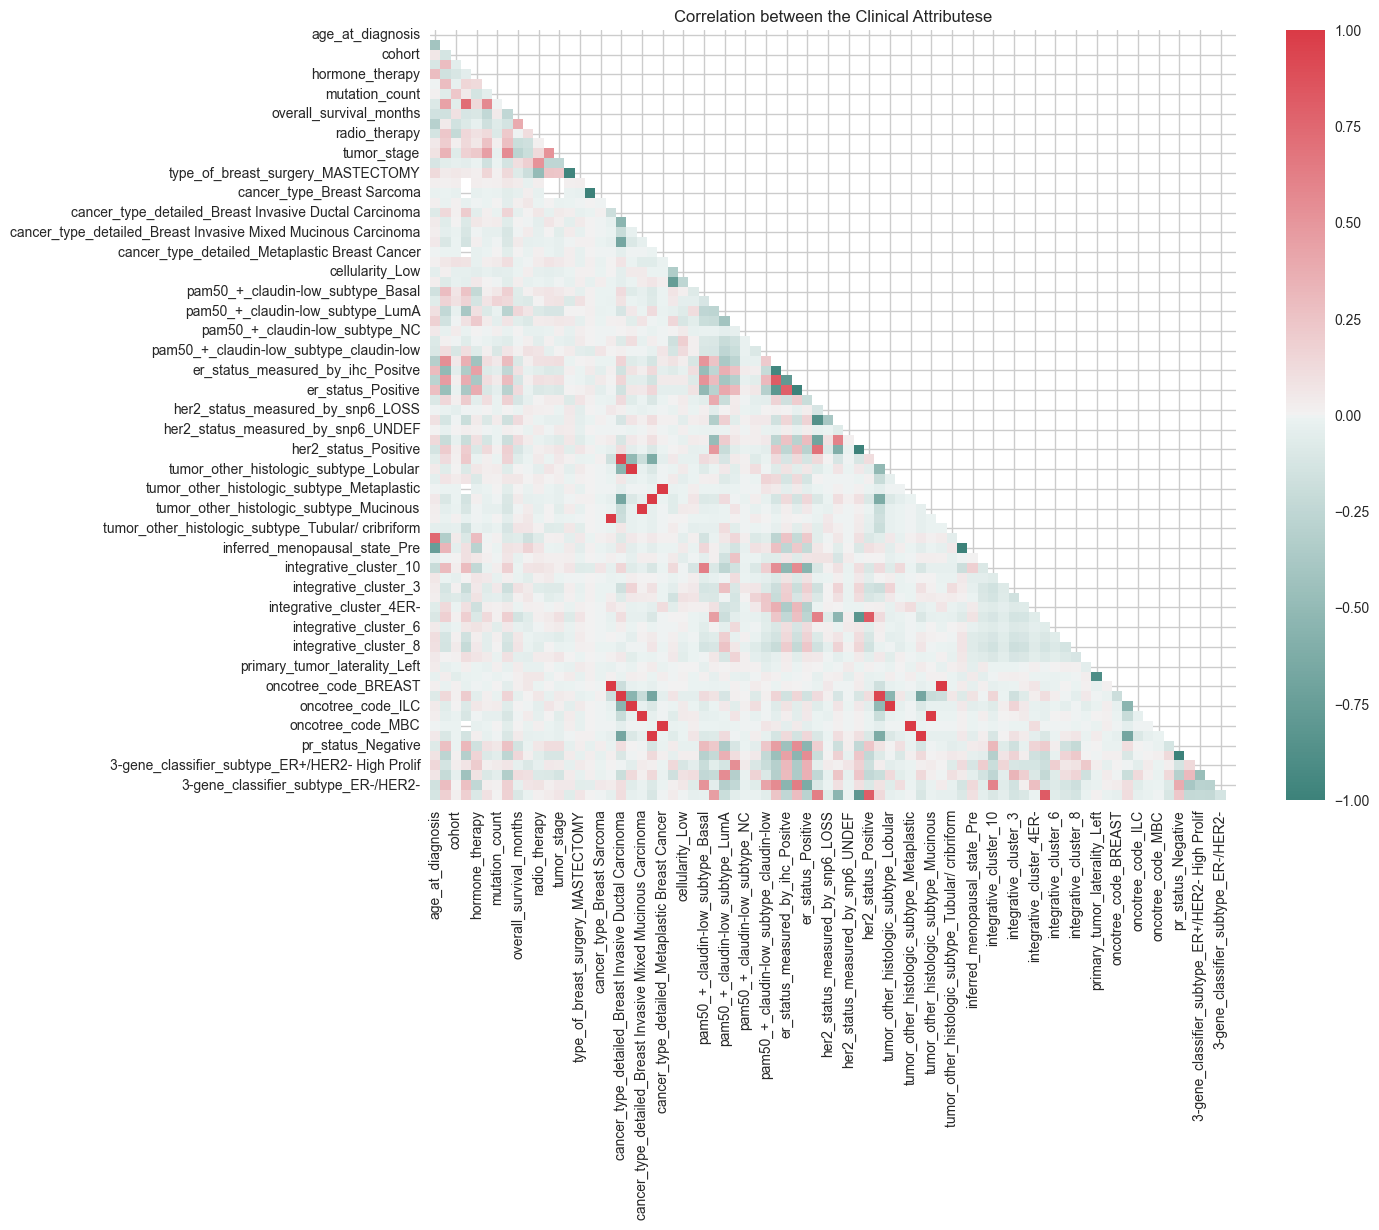

In [ ]:
fig, axs = plt.subplots(figsize = (13, 10)) 
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
no_id_df = pd.get_dummies(df.drop('patient_id',axis=1 ), columns= categorical_columns)
#no_id_clinical_df= clinical_df.drop('ID',axis=1 )
mask = np.triu(np.ones_like(no_id_df.corr(), dtype = np.bool_))
sns.heatmap(no_id_df.corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation between the Clinical Attributese')

plt.show()

In [ ]:
survival_corr = no_id_df.corr()['overall_survival'].sort_values(ascending = False)
survival_corr_df = pd.DataFrame({'Correlation': survival_corr})
survival_corr_df.head(10)

,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
type_of_breast_surgery_BREAST CONSERVING,0.187856
inferred_menopausal_state_Pre,0.170915
radio_therapy,0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif,0.094463
pam50_+_claudin-low_subtype_claudin-low,0.091397
integrative_cluster_10,0.076256
pam50_+_claudin-low_subtype_LumA,0.065186
3-gene_classifier_subtype_ER-/HER2-,0.065135


In [ ]:
survival_corr_df.tail()

,Correlation
lymph_nodes_examined_positive,-0.164498
inferred_menopausal_state_Post,-0.170915
type_of_breast_surgery_MASTECTOMY,-0.184259
tumor_stage,-0.188790
age_at_diagnosis,-0.303666


### Stastical summaries of numeric attributes in dataframe

In [ ]:
num_attributes_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count',
                       'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
cat_attributes_columns = ['chemotherapy', 'cohort', 'neoplasm_histologic_grade','hormone_therapy', 
                        'overall_survival', 'radio_therapy', 'tumor_stage' ]
# Statistical summary for numerical clinical attributes 
df[num_attributes_columns].describe(). T


,count,mean,std,min,25%,50%,75%,max
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.770000,70.592500,96.29
lymph_nodes_examined_positive,1904.0,2.002101,4.079993,0.00,0.000,0.000000,2.000000,45.00
mutation_count,1859.0,5.697687,4.058778,1.00,3.000,5.000000,7.000000,80.00
nottingham_prognostic_index,1904.0,4.033019,1.144492,1.00,3.046,4.042000,5.040250,6.36
overall_survival_months,1904.0,125.121324,76.334148,0.00,60.825,115.616667,184.716667,355.20
tumor_size,1884.0,26.238726,15.160976,1.00,17.000,23.000000,30.000000,182.00


### Statistical summary of categorical attributes in dataframe

In [ ]:
cat_attributes_columns.extend(df.select_dtypes(include=['object']).columns.tolist())
df[cat_attributes_columns].astype('category').describe().T

,count,unique,top,freq
chemotherapy,1904,2,0,1508
cohort,1904.0,5.0,3.0,734.0
neoplasm_histologic_grade,1832.0,3.0,3.0,927.0
hormone_therapy,1904,2,1,1174
overall_survival,1904,2,0,1103
radio_therapy,1904,2,1,1137
tumor_stage,1403.0,5.0,2.0,800.0
type_of_breast_surgery,1882,2,MASTECTOMY,1127
cancer_type,1904,2,Breast Cancer,1903
cancer_type_detailed,1889,6,Breast Invasive Ductal Carcinoma,1500


In [ ]:
#statistics for the no treatment group and comparison with the baseline
no_treatment = df[(df['chemotherapy']==0) & (df['hormone_therapy']==0) & (df['radio_therapy']==0)]
print("Number of patients who had no treatment: " , no_treatment.shape[0])
print("Proportion of survival with no treatment: " , ("%.3f" %np.mean(no_treatment["overall_survival"])))
print("Baseline proportion of survival in all groups: ", ("%.3f" %np.mean(df["overall_survival"])))

Number of patients who had no treatment:  289
Proportion of survival with no treatment:  0.381
Baseline proportion of survival in all groups:  0.421


In [ ]:
#What the average patient looks like
print("Mean of age : " + "%.3f" %np.mean(df['age_at_diagnosis']))
print("Most occurring tumour stage :", stats.mode(df['tumor_stage'])[0][0].astype(int))
print("Most occurring histopathological type :", stats.mode(df['neoplasm_histologic_grade'])[0][0].astype(int))
print("Mean of tumour diameter : " + "%.3f" %np.mean(df['tumor_size']))
print("Probability of survival : "+ "%.3f" %(df["overall_survival"].value_counts()/df["overall_survival"].count()).iloc[1])

Mean of age : 61.087
Most occurring tumour stage : 2
Most occurring histopathological type : 3
Mean of tumour diameter : 26.239
Probability of survival : 0.421


In [ ]:
#finding number of outliers in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)

chemotherapy                      396
lymph_nodes_examined_positive     210
tumor_size                        142
mutation_count                     62
tumor_stage                         9
age_at_diagnosis                    1
tumor_other_histologic_subtype      0
radio_therapy                       0
primary_tumor_laterality            0
neoplasm_histologic_grade           0
patient_id                          0
pam50_+_claudin-low_subtype         0
overall_survival_months             0
overall_survival                    0
oncotree_code                       0
nottingham_prognostic_index         0
pr_status                           0
3-gene_classifier_subtype           0
integrative_cluster                 0
inferred_menopausal_state           0
hormone_therapy                     0
her2_status_measured_by_snp6        0
her2_status                         0
er_status_measured_by_ihc           0
er_status                           0
death_from_cancer                   0
cohort      

In [ ]:
# Relationship between genetic attributes and outcomes
# dropping mutations
genetic_features_to_drop = df.columns[520:]
df3 = data.drop(genetic_features_to_drop, axis=1)
# droping clinical data
genetic_features_to_drop = df3.columns[4:35]
df3 = df3.drop(genetic_features_to_drop, axis=1)
df3 = df3.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
df3 = df3.iloc [:,:-174]
df3['overall_survival']= data['overall_survival']

df3.head()

,patient_id,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,overall_survival
0,0,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201,-0.4844,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,1
1,2,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390,1.2266,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,1
2,5,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721,-1.7910,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0
3,6,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010,-1.3905,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,1
4,8,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320,-0.3582,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,0


In [ ]:
#Finding maximum and std in each column, std is always 1 because the datapoints are z-scores
max_values = df3.max()
std = df3.std(axis = 0, skipna = True)
max_data = pd.concat([max_values, std], axis = 1, keys = ['max_values', 'std'])
max_data.sort_values(by='max_values', ascending = False).head()

,max_values,std
patient_id,7299.0000,2358.478332
cyp3a7,20.3950,1.000265
lipi,20.1984,1.000262
tubb4a,18.6351,1.000263
hes5,17.1431,1.000262


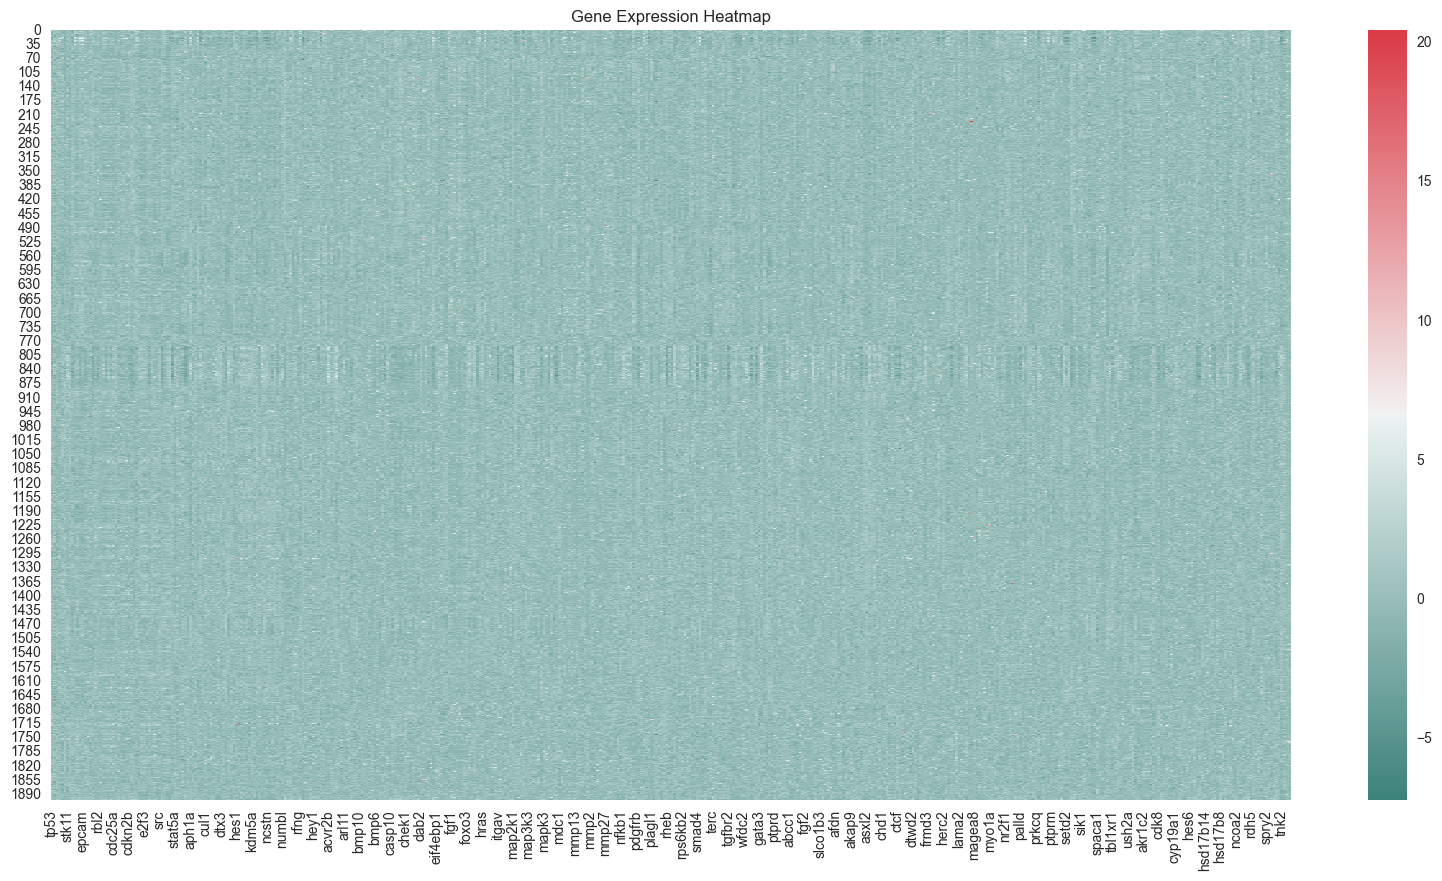

In [ ]:
# Visualizing the mRNA values in a heatmap.
fig, axs = plt.subplots(figsize = (20, 10)) 
sns.heatmap(df3.drop(['patient_id','overall_survival'], axis=1), ax = axs, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Gene Expression Heatmap')

plt.show()

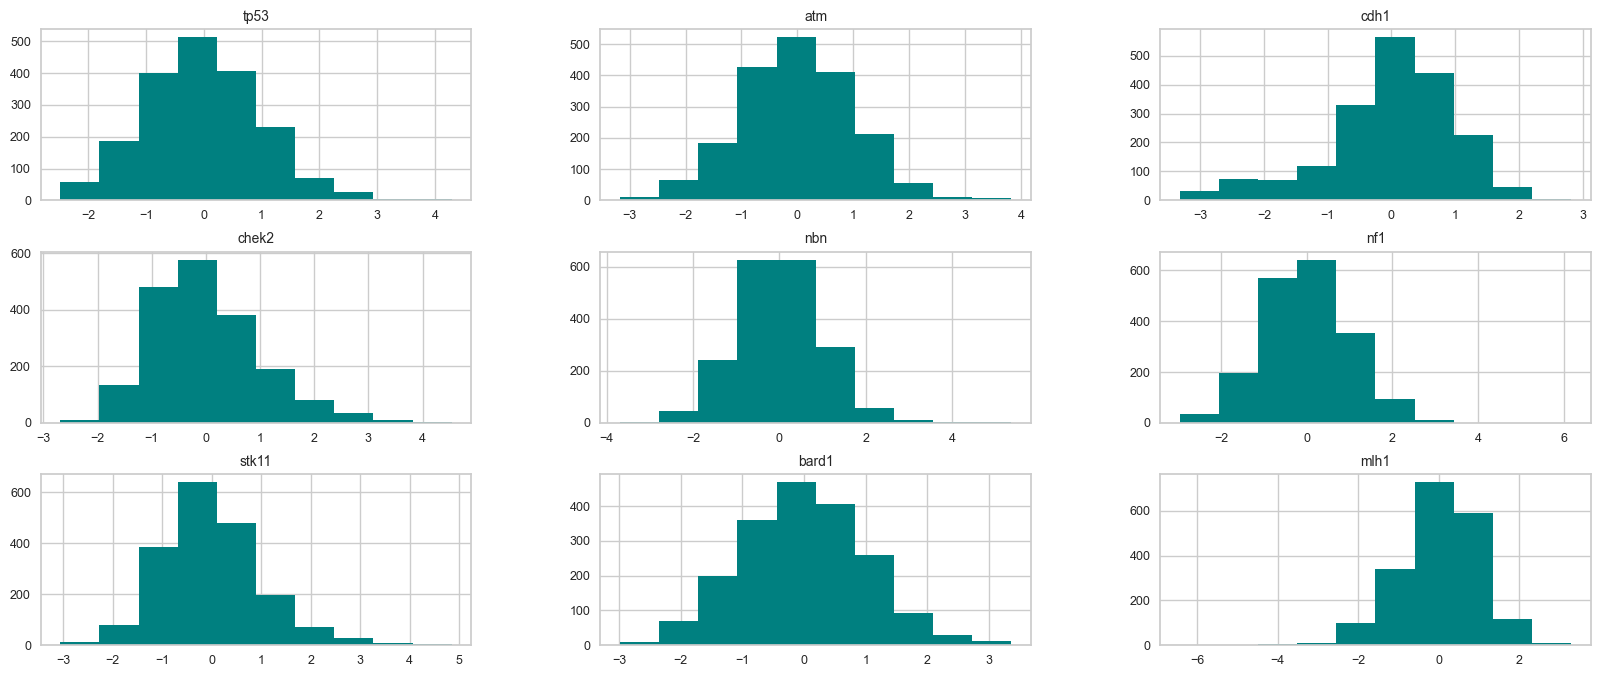

In [ ]:
params = {'axes.titlesize':'10',
          'xtick.labelsize':'9',
          'ytick.labelsize':'9'}
matplotlib.rcParams.update(params)
#plt.subplots_adjust(hspace=0.5) 
df3.drop(['patient_id','overall_survival'], axis=1).iloc[:,:9].hist(figsize=(20,8), color=color_hist)
plt.show()

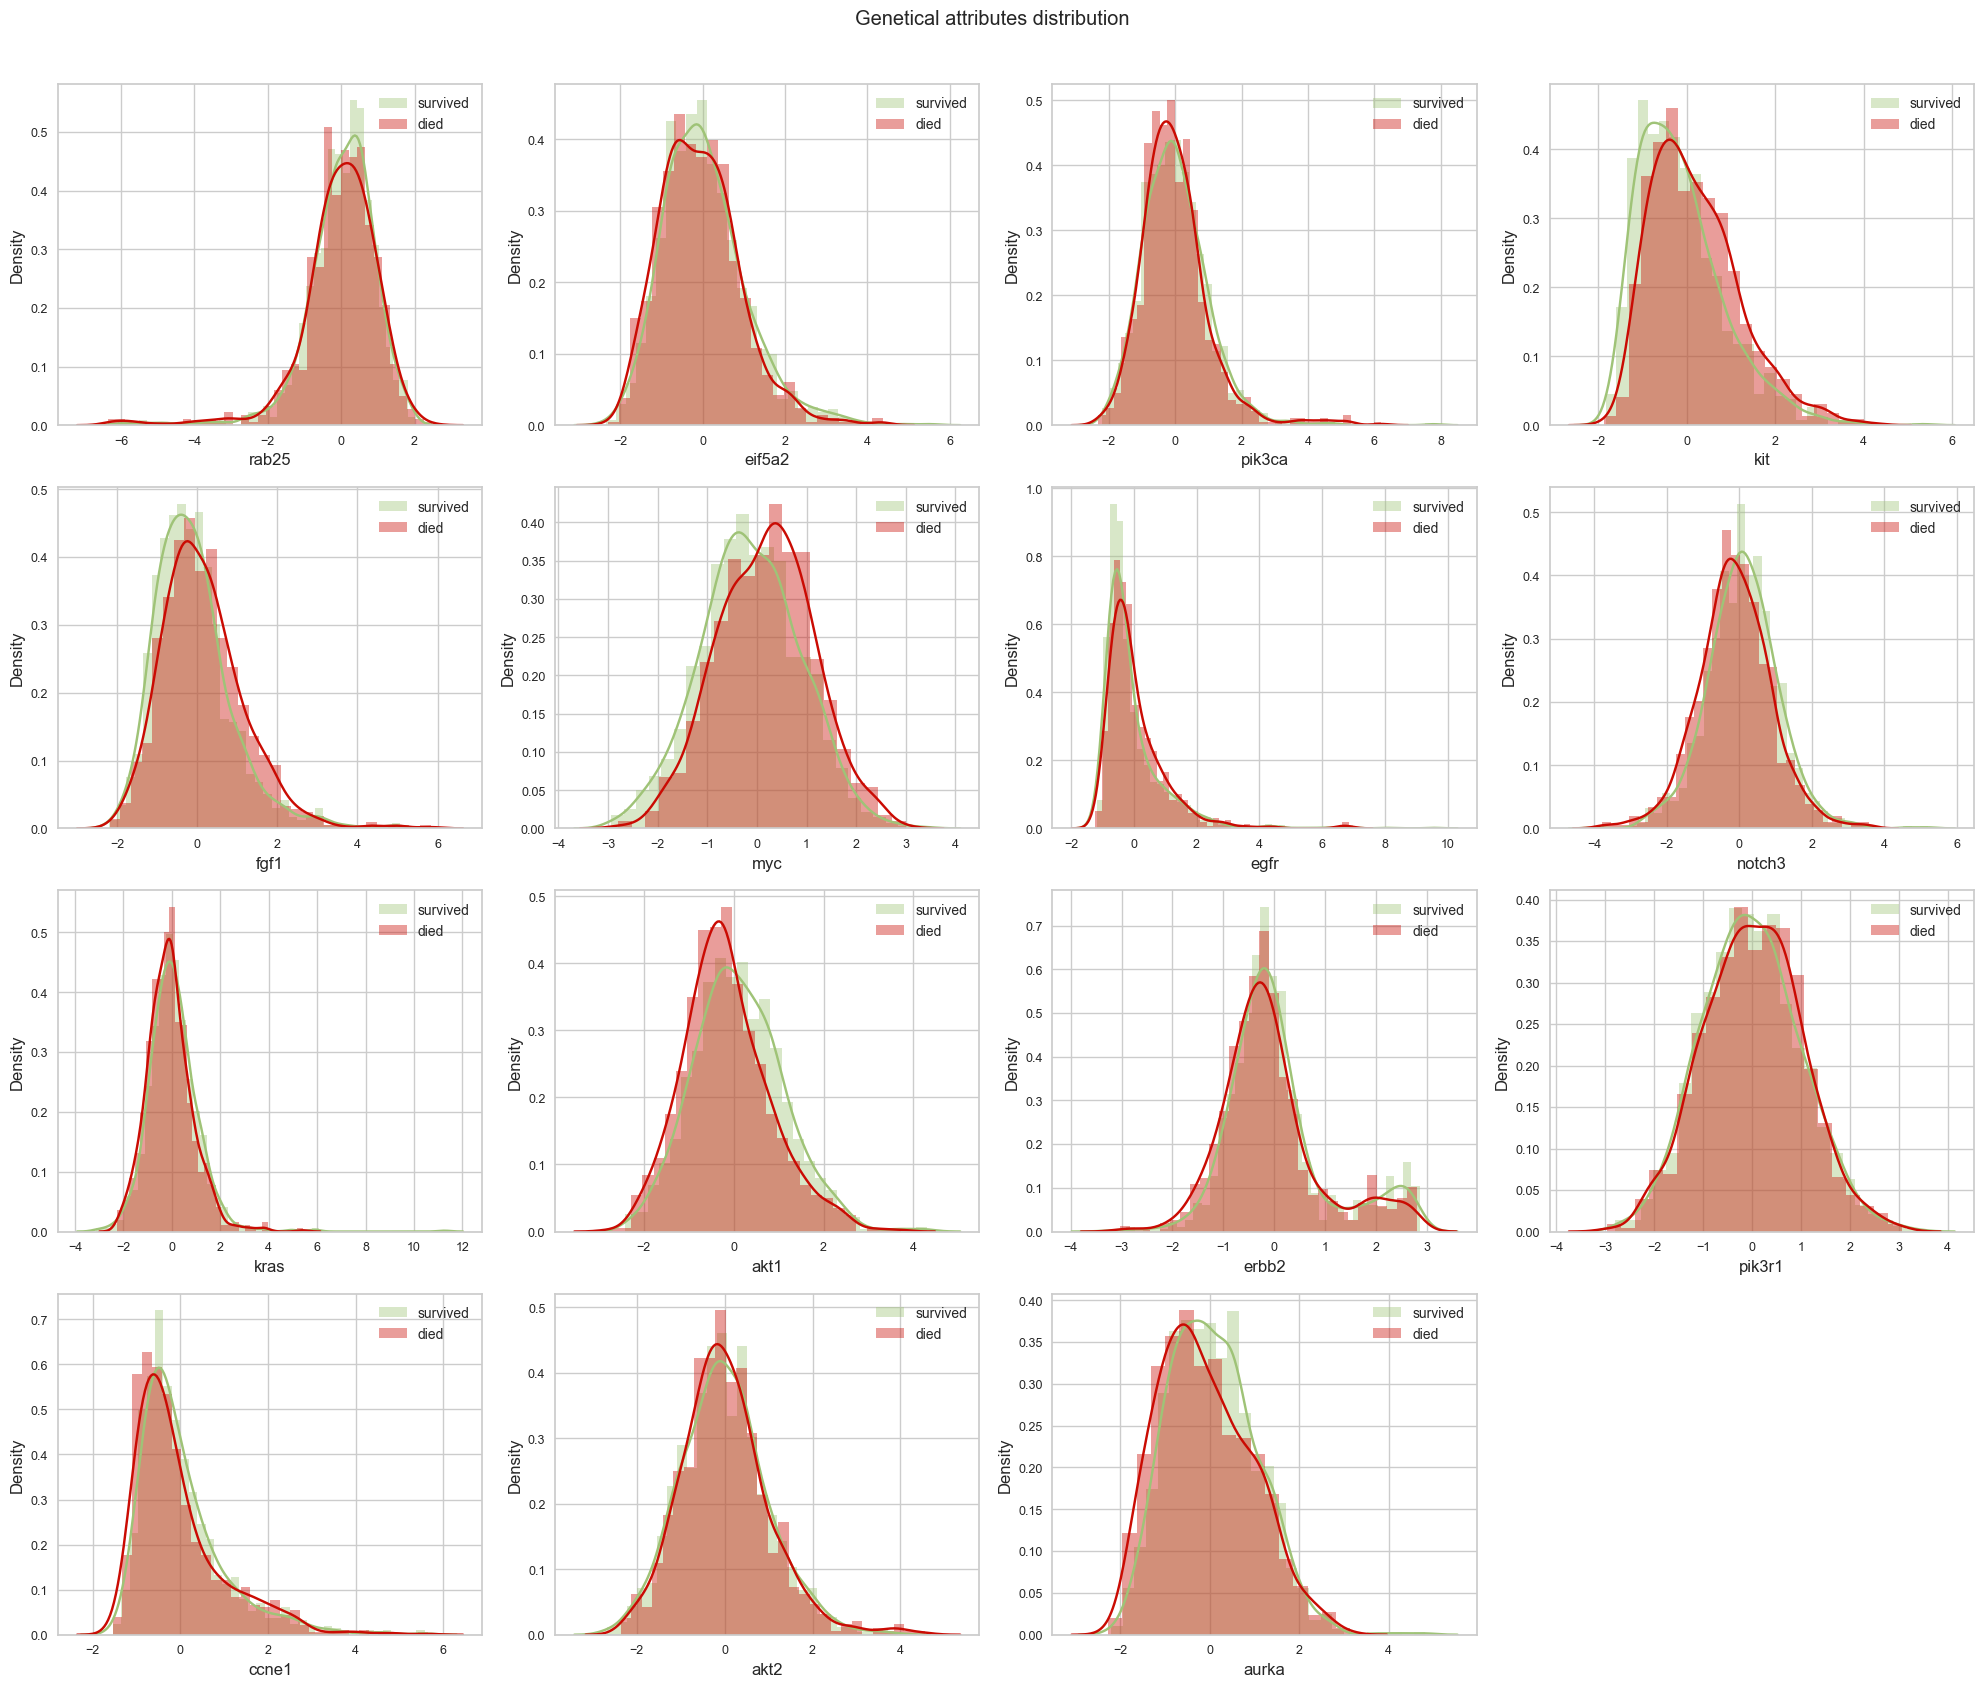

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0

gene_list = ['rab25', 'eif5a2', 'pik3ca', 'kit', 'fgf1', 'myc', 'egfr', 'notch3', 'kras', 'akt1', 'erbb2', 'pik3r1', 'ccne1', 'akt2', 'aurka']
for i in df3.drop(['patient_id'], axis=1).loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df3[i][df3['overall_survival']==0], color='g', label = 'survived')
    sns.distplot(df3[i][df3['overall_survival']==1], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Genetical attributes distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


In [ ]:
#finding number of outliers in each column
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)

IQR = Q3-Q1
((df3 < (Q1 - 1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False).head(10)

gldc       230
erbb2      224
ttyh1      213
ugt2b15    208
muc16      202
hsd17b2    197
dll3       194
mmp1       186
mmp12      180
ddc        179
dtype: int64

### Visualization of correlation between the genetic attributes and outcome

Text(0.5, 1.0, 'Histogram of Correlation of genes with the survival')

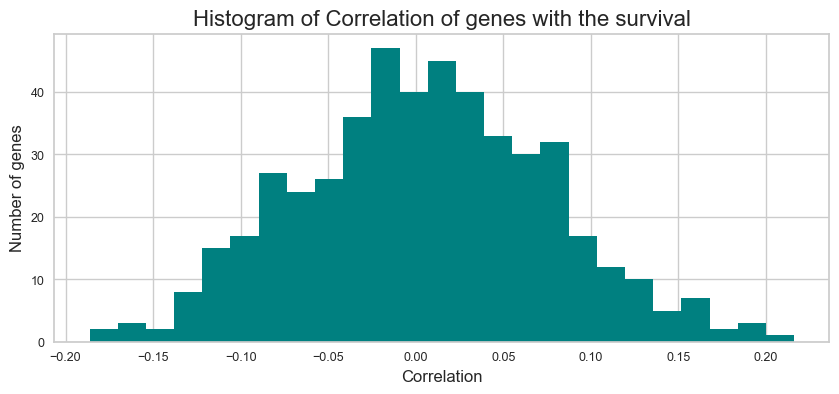

In [ ]:
#how varied are genes and how well do they correlate with eventdeath?
fig, ax = plt.subplots(figsize=(10,4))

#plot histogram of variation using standard deviation as a measure
corrs=[]
for col in df3.drop(['patient_id'], axis = 1).columns:
    corr = df3[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)

corrs.pop(-1)
ax.hist(corrs,  bins=25, color = color_hist)
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the survival", size=16)

In [ ]:
#Max, min and mean of correlation
print("Maximum Correlation: " + "%.3f" %max(corrs))
print("Minimum Correlation: " + "%.3f" %min(corrs))
print("Mean Correlation: " + "%.3f" %np.mean(corrs))

Maximum Correlation: 0.216
Minimum Correlation: -0.186
Mean Correlation: 0.005


### Finding out the relationship between genetic mutation and outcomes 

In [ ]:
# droping clinical and genetic data
mutation_features_to_drop = df.columns[4:520]
df4 = data.drop(mutation_features_to_drop, axis=1)
df4 = df4.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)

# if there is a mutation=1, no-mutation=0
for column in df4.columns[1:]:
    df4[column]=pd.to_numeric(df4[column], errors='coerce').fillna(1).astype(int)

df4.insert(loc=1 , column='overall_survival', value=data['overall_survival'])

df4.head()

,patient_id,overall_survival,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,1,-1,0,-1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,-1,0,-1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1,0,0,-1,0,1,0,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Some genes had much more mutations than other genes. For example: PIK3CA (coding mutations in 40.1% of the samples) and TP53 (35.4%) dominated the mutation landscape. Only five other genes harboured coding mutations in at least 10% of the samples: MUC16 (16.8%); AHNAK2 (16.2%); SYNE1 (12.0%); KMT2C (also known as MLL3; 11.4%) and GATA3 (11.1%).

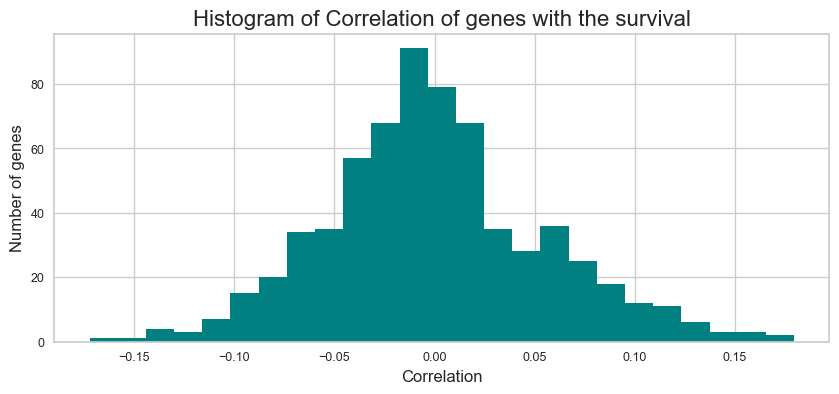

In [ ]:
#plot histogram of variation using standard deviation as a measure
fig, ax = plt.subplots(figsize=(10,4))
corrs=[]
for col in df4.drop(['patient_id'], axis = 1).columns:
    corr = df4[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)
    
corrs.pop(0)
ax.hist(corrs,  bins=25, color = color_hist)
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the survival", size=16)


plt.show()

### Preprocessing and modelling 

In [ ]:
BOLD = '\033[1m'
END = '\033[0m'
# using a stratfied k fold because we need the distribution of the to classes in all of the folds to be the same.
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
print('Baseline accuracy:' )
print(df["overall_survival"].value_counts()/df["overall_survival"].count())

Baseline accuracy:
0    0.579307
1    0.420693
Name: overall_survival, dtype: float64


### Classification with only clinical attributes

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
# Getting dummies for all categorical columns
dummies_df = pd.get_dummies(df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_df.dropna(inplace = True)


In [ ]:
# data splitting
X = dummies_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_df['overall_survival']
# using stratify for y because we need the distribution of the two classes to be equal in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

applying additional functions by using different classifiers 

In [ ]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    print("\n")
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

def basic_classifiers (X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    ######################################################################################################  K Neighbors Classifier model
    
    params = {
    "n_neighbors" : [5,15,25,30,35,40, 100],
    "weights" : ["uniform" , "distance"]
    }
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn= GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=4)
    knn_pred, knn_test, knn_train = model_metrics(knn, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Logistic Regression
    params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = GridSearchCV(LogisticRegression(random_state=42), params, n_jobs=-1, cv=4)
    lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Decision Tree
    
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier(random_state=42)
    dt_pred, dt_test, dt_train = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Random Forest Classifier
    
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier(random_state=42)
    rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Extra Trees Classifier
   
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier(random_state=42)
    et_pred, et_test, et_train = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### AdaBoost Classifier
    
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier(random_state=42)
    ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### SVC Classifier
    
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC(random_state=42)
    svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

    
    #bar chart of accuracy scores
    inds = range(1,8)
    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    scores_all = [knn_train, lg_train, dt_train, rf_train, et_train, ab_train, svc_train]
    scores_predictive = [knn_test, lg_test, dt_test, rf_test, et_test, ab_test, svc_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set")
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores for basic models", fontsize=17)
    ax1.set_xticks(range(1,8))
    ax1.set_xticklabels(labels, size=12, rotation=40, ha="right")
    ax1.legend()

    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    for label, pred in zip(labels, [knn_pred, lg_pred, dt_pred, rf_pred, et_pred, ab_pred, svc_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 12})
    ax2.set_title("Roc curve for for basic models", fontsize=17)

    plt.show()
    
    
# a function that takes a dataframe and plots histograms for all columns 
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=15)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column].dropna(), color= color_hist ) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()
    
    
# a function that takes a dataframe and plots barplot for all columns 
def subplot_bargraph(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(dataframe[column].dropna(), color= color_hist, ax=ax[i], hue=dataframe['eventdeath']) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()   


K Neighbors Classifier Model:
CV scores:  [0.67045455 0.6875     0.67428571 0.64571429 0.66857143]
CV Standard Deviation:  0.013522181199120655

CV Mean score:  0.6693051948051948
Train score:    1.0
Test score:     0.6458333333333334



Confusion Matrix: 
[[203  42]
 [111  76]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       245
           1       0.64      0.41      0.50       187

    accuracy                           0.65       432
   macro avg       0.65      0.62      0.61       432
weighted avg       0.65      0.65      0.63       432


Logistic Regression Model:
CV scores:  [0.71590909 0.72159091 0.74857143 0.70285714 0.74857143]
CV Standard Deviation:  0.018245805771028675

CV Mean score:  0.7275
Train score:    0.7765108323831242
Test score:     0.7777777777777778



Confusion Matrix: 
[[201  44]
 [ 52 135]]
Classification Report:  
              precision    recall  f1-score   support

      

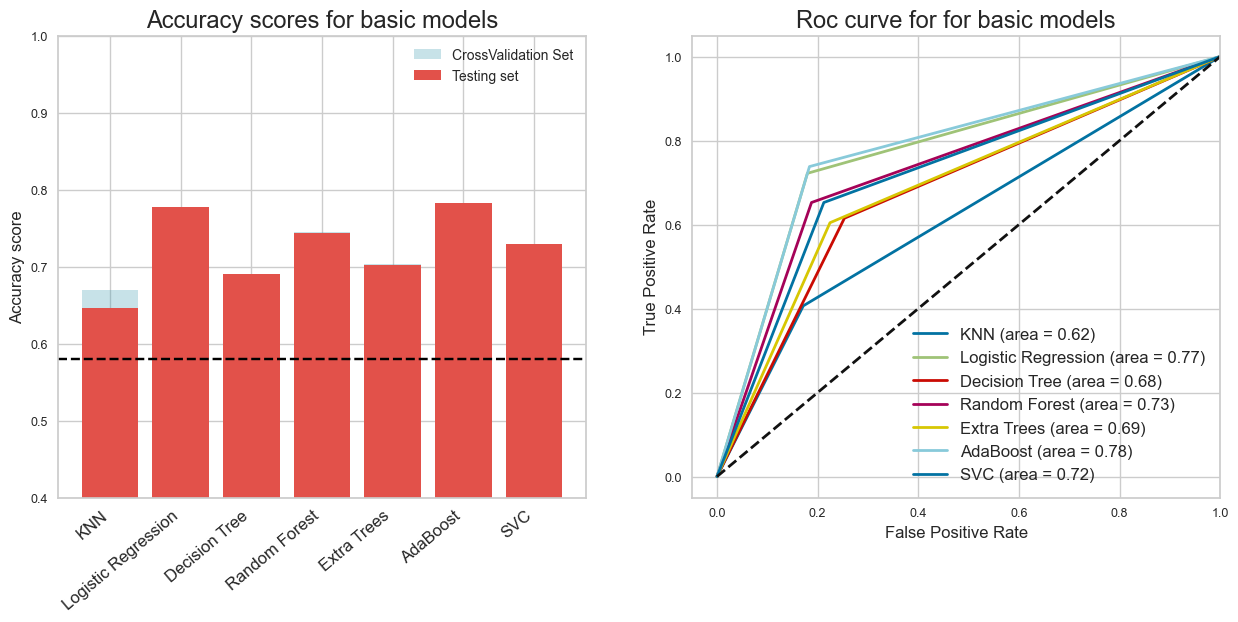

In [ ]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)

In [ ]:
def RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    print(); print(BOLD + 'Grid Search with Random Forest Classifier Model:' + END)
    #kfold=5
    rf_params = {
        #'n_estimators': [10, 50, 100, 150, 200, 250],
        'max_features':[2, 3, 5, 7, 8],
        #'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini', 'entropy'],
    }

    random_forest = RandomForestClassifier(n_estimators=100)
    gs = GridSearchCV(random_forest, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test, gs_train = model_metrics(gs, kfold, X_train, X_test, y_train, y_test)
    
    return gs.best_estimator_, gs_pred, gs_test, gs_train


def ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    print(); print(BOLD + 'Grid Search with Extra Trees Model:' + END)
    # Scaling 
      
    rf_params = {
        #'n_estimators': [10, 100, 400, 800, 1100, 1850],
        #'max_features':['auto'],
        'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini'],
    }

    extra_trees = ExtraTreesClassifier(n_estimators=100)    
    gs = GridSearchCV(extra_trees, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test, gs_train = model_metrics(gs, kfold, X_train, X_test, y_train, y_test)
    
    return gs.best_estimator_, gs_pred, gs_test, gs_train

def RF_ET_GridSearch (X_train, X_test, y_train, y_test, kfold):
    rf_gs_best_estimator, rf_pred, rf_test, rf_train = RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)
    et_gs_best_estimator, et_pred, et_test, et_train = ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, kfold)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(13,6))

    fig.suptitle("Random Forest and Extra Trees with Grid Search", fontsize=16)
    #bar chart of accuracy scores
    inds = range(1,3)
    labels = ["Random Forest", "Extra Trees" ]
    scores_all = [rf_train, et_train]
    scores_predictive = [rf_test, et_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set") #
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores", fontsize=17)
    ax1.set_xticks(range(1,3))
    ax1.set_xticklabels(labels, size=14)
    ax1.legend()

    labels = ["Random Forest", "Extra Trees" ]
    for label, pred in zip(labels, [rf_pred, et_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 14})
    ax2.set_title("Roc curve", fontsize=17)

    plt.show()

In [ ]:
RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)


Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CV scores:  [0.70454545 0.73863636 0.79428571 0.68       0.76      ]
CV Standard Deviation:  0.040259857561622134

CV Mean score:  0.7354935064935066
Train score:    1.0
Test score:     0.7245370370370371



Confusion Matrix: 
[[196  49]
 [ 70 117]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       245
           1       0.70      0.63      0.66       187

    accuracy                           0.72       432
   macro avg       0.72      0.71      0.72       432
weighted avg       0.72      0.72      0.72

(RandomForestClassifier(max_features=8),
 array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 

Predicting without the time related columns (overall survival month)

In [ ]:
# data splitting
X_no_time = dummies_df.drop(['death_from_cancer', 'overall_survival','overall_survival_months' ], axis=1)
y_no_time = dummies_df['overall_survival']

X_train_no_time, X_test_no_time, y_train_no_time, y_test_no_time = train_test_split(X_no_time, y_no_time, test_size=0.33, random_state=42, stratify = y)


K Neighbors Classifier Model:
CV scores:  [0.65340909 0.67045455 0.65714286 0.63428571 0.66285714]
CV Standard Deviation:  0.012122693168639898

CV Mean score:  0.6556298701298701
Train score:    1.0
Test score:     0.6319444444444444



Confusion Matrix: 
[[198  47]
 [112  75]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       245
           1       0.61      0.40      0.49       187

    accuracy                           0.63       432
   macro avg       0.63      0.60      0.60       432
weighted avg       0.63      0.63      0.61       432


Logistic Regression Model:
CV scores:  [0.67045455 0.69886364 0.71428571 0.67428571 0.68571429]
CV Standard Deviation:  0.016171016386001123

CV Mean score:  0.6887207792207792
Train score:    0.7331812998859749
Test score:     0.6712962962962963



Confusion Matrix: 
[[186  59]
 [ 83 104]]
Classification Report:  
              precision    recall  f1-score   sup

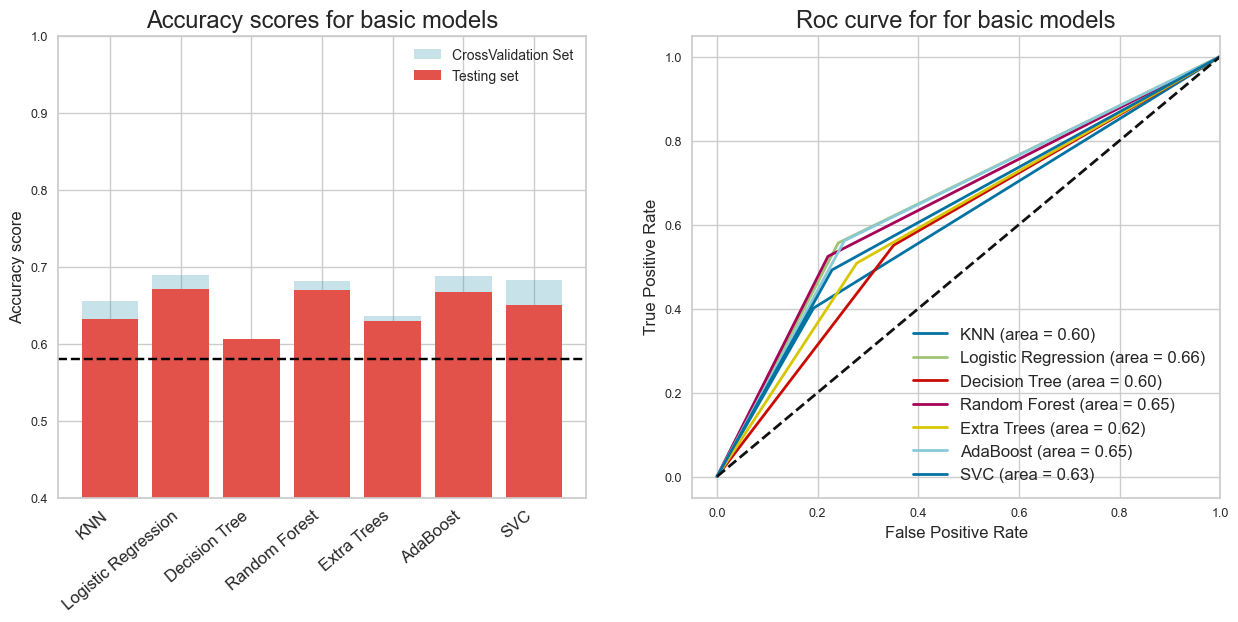

In [ ]:
basic_classifiers( X_train_no_time, X_test_no_time, y_train_no_time, y_test_no_time, kfold)

In [ ]:
RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)


Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CV scores:  [0.73295455 0.76704545 0.80571429 0.69142857 0.78285714]
CV Standard Deviation:  0.04003843342491819

CV Mean score:  0.756
Train score:    1.0
Test score:     0.7430555555555556



Confusion Matrix: 
[[197  48]
 [ 63 124]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       245
           1       0.72      0.66      0.69       187

    accuracy                           0.74       432
   macro avg       0.74      0.73      0.74       432
weighted avg       0.74      0.74      0.74       432



(RandomForestClassifier(max_features=8),
 array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 

Classification with only genetic attributes 

In [ ]:
# data splitting
X = df3.drop(['patient_id', 'overall_survival'], axis=1)
y = df3['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)


K Neighbors Classifier Model:
CV scores:  [0.56862745 0.65490196 0.62352941 0.61568627 0.65882353]
CV Standard Deviation:  0.0325655521443556

CV Mean score:  0.624313725490196
Train score:    0.6650980392156862
Test score:     0.6629570747217806



Confusion Matrix: 
[[288  76]
 [136 129]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       364
           1       0.63      0.49      0.55       265

    accuracy                           0.66       629
   macro avg       0.65      0.64      0.64       629
weighted avg       0.66      0.66      0.65       629


Logistic Regression Model:
CV scores:  [0.59215686 0.67058824 0.65490196 0.6        0.62352941]
CV Standard Deviation:  0.03041681479163186

CV Mean score:  0.628235294117647
Train score:    0.7866666666666666
Test score:     0.6693163751987281



Confusion Matrix: 
[[274  90]
 [118 147]]
Classification Report:  
              precision    recall  f1-s

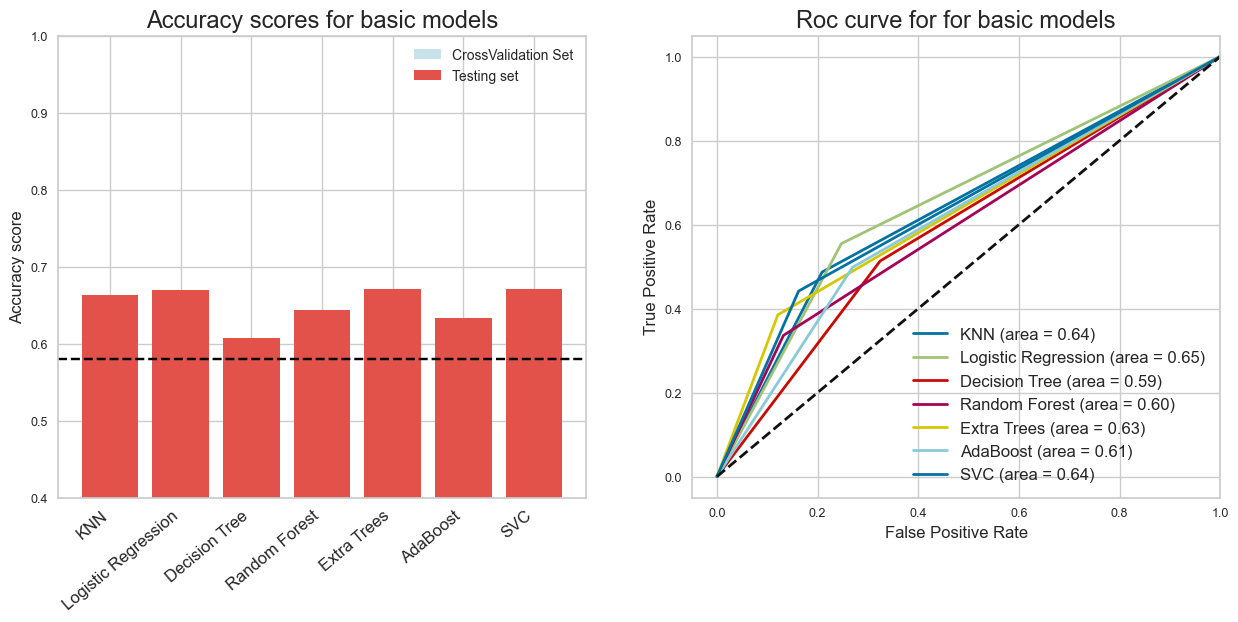

In [ ]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)

In [ ]:
RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)


Grid Search with Random Forest Classifier Model:
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
CV scores:  [0.60784314 0.61960784 0.62745098 0.65098039 0.62745098]
CV Standard Deviation:  0.014117647058823547

CV Mean score:  0.6266666666666667
Train score:    1.0
Test score:     0.6343402225755167



Confusion Matrix: 
[[319  45]
 [185  80]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.63      0.88      0.74       364
           1       0.64      0.30      0.41       265

    accuracy                           0.63       629
   macro avg       0.64      0.59      0.57       629
weighted avg       0.64      0.63      0.60

(RandomForestClassifier(max_features=7),
 array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    print("\n")
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm,annot=True)
    return test_pred, test_score, results.mean()

def basic_classifiers (X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    ######################################################################################################  K Neighbors Classifier model
    
    params = {
    "n_neighbors" : [5,15,25,30,35,40, 100],
    "weights" : ["uniform" , "distance"]
    }
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn= GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=4)
    knn_pred, knn_test, knn_train = model_metrics(knn, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Logistic Regression
    params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = GridSearchCV(LogisticRegression(random_state=42), params, n_jobs=-1, cv=4)
    lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Decision Tree
    
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier(random_state=42)
    dt_pred, dt_test, dt_train = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Random Forest Classifier
    
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier(random_state=42)
    rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Extra Trees Classifier
   
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier(random_state=42)
    et_pred, et_test, et_train = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### AdaBoost Classifier
    
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier(random_state=42)
    ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### SVC Classifier
    
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC(random_state=42)
    svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

    
    #bar chart of accuracy scores
    inds = range(1,8)
    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    scores_all = [knn_train, lg_train, dt_train, rf_train, et_train, ab_train, svc_train]
    scores_predictive = [knn_test, lg_test, dt_test, rf_test, et_test, ab_test, svc_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set")
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores for basic models", fontsize=17)
    ax1.set_xticks(range(1,8))
    ax1.set_xticklabels(labels, size=12, rotation=40, ha="right")
    ax1.legend()

    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    for label, pred in zip(labels, [knn_pred, lg_pred, dt_pred, rf_pred, et_pred, ab_pred, svc_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 12})
    ax2.set_title("Roc curve for for basic models", fontsize=17)

    plt.show()
    
    
# a function that takes a dataframe and plots histograms for all columns 
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=15)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column].dropna(), color= color_hist ) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()
    
    
# a function that takes a dataframe and plots barplot for all columns 
def subplot_bargraph(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(dataframe[column].dropna(), color= color_hist, ax=ax[i], hue=dataframe['eventdeath']) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()   


K Neighbors Classifier Model:
CV scores:  [0.56862745 0.65490196 0.62352941 0.61568627 0.65882353]
CV Standard Deviation:  0.0325655521443556

CV Mean score:  0.624313725490196
Train score:    0.6650980392156862
Test score:     0.6629570747217806



Confusion Matrix: 
[[288  76]
 [136 129]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.68      0.79      0.73       364
           1       0.63      0.49      0.55       265

    accuracy                           0.66       629
   macro avg       0.65      0.64      0.64       629
weighted avg       0.66      0.66      0.65       629


Logistic Regression Model:
CV scores:  [0.59215686 0.67058824 0.65490196 0.6        0.62352941]
CV Standard Deviation:  0.03041681479163186

CV Mean score:  0.628235294117647
Train score:    0.7866666666666666
Test score:     0.6693163751987281



Confusion Matrix: 
[[274  90]
 [118 147]]
Classification Report:  
              precision    recall  f1-s

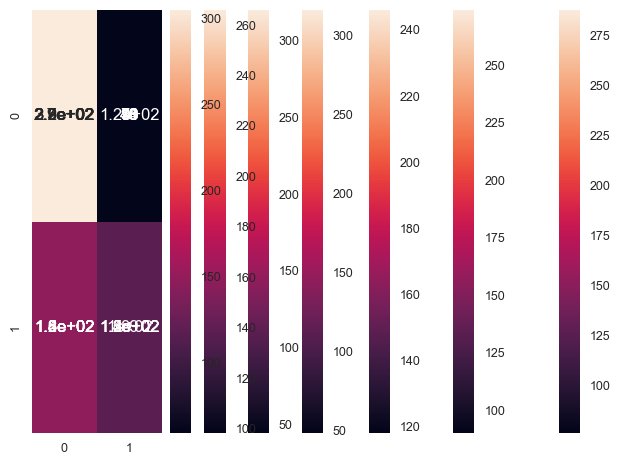

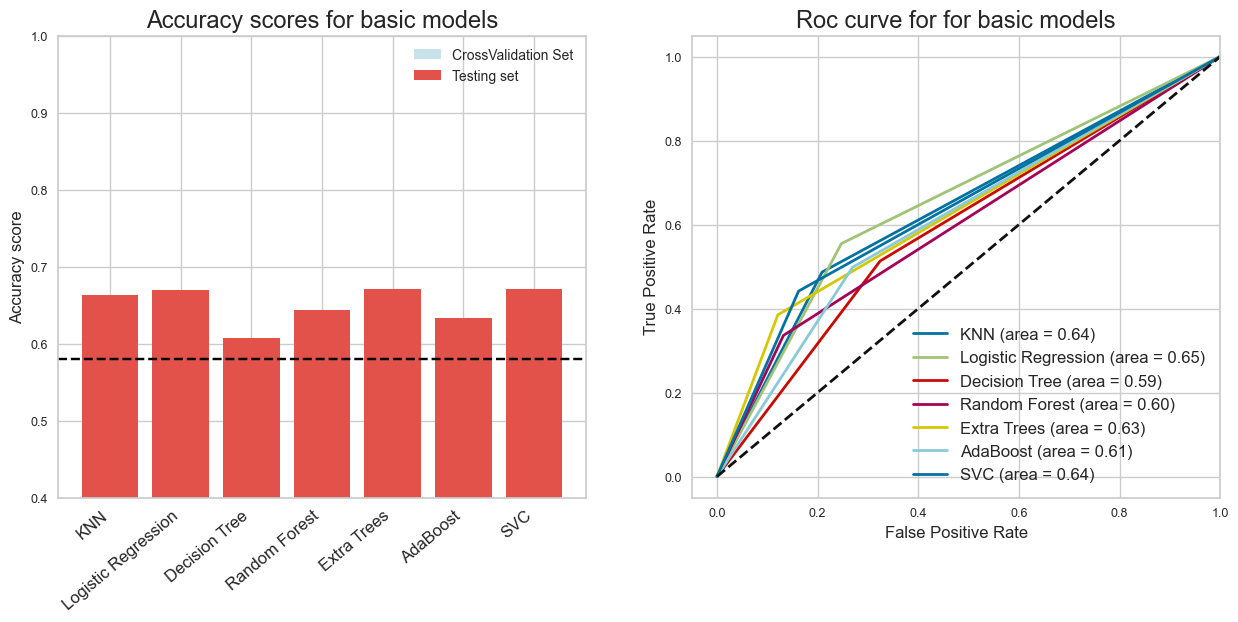

In [ ]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)